<a href="https://colab.research.google.com/github/Sandnyit/Kickstarter/blob/main/Kickstarter_Sandnyit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

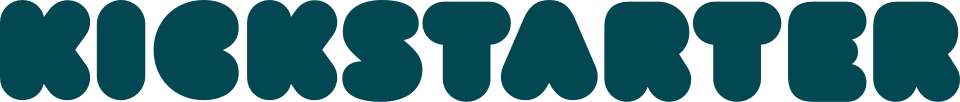




**Sandnyit Pathare**

# Initialization

## Importing Libraries

In [ ]:
#importing basic maths and data manipultion libraries
import pandas as pd
import numpy as np

#importing visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

#importing preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#importing libraries for classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#importing libraries for evaluation
from sklearn.metrics import roc_auc_score, roc_curve,classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score
#Sandnyit

## Importing Data

In [ ]:
data=pd.read_csv('kickstarter.csv')

In [ ]:
data.columns
#Sandnyit

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

# Feature Engineering

## Handling Missing data
Checking 'NaN' Values

In [ ]:
data.isna().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

Replacing 'NaN' Values

In [ ]:
data['usd pledged'].fillna(0,inplace=True)
data['name'].fillna('Sandnyit',inplace=True)

## Duplicates

In [ ]:
# Checking for duplicates of individual projects, and sorting by id #Sandnyit
print(f"Out of the {len(data)} projects in the dataset, there are {len(data[data.duplicated(subset='ID')])} which are listed more than once.")

Out of the 378661 projects in the dataset, there are 0 which are listed more than once.


Setting 'ID' as index

In [ ]:
data.set_index('ID', inplace=True)
data.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


## Handling Datetime Featrues

### Seperating out Date and Time

In [ ]:
date = []
time = []
for i in data['launched']:
  x = i.split(" ")
  date.append(x[0])
  time.append(x[1])

In [ ]:
date[0:5]

['2015-08-11', '2017-09-02', '2013-01-12', '2012-03-17', '2015-07-04']

In [ ]:
time[0:5]

['12:12:28', '04:43:57', '00:20:50', '03:24:11', '08:35:03']

In [ ]:
data['launch_date'] = date

In [ ]:
data['launch_time'] = time

In [ ]:
data.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launch_date,launch_time
ID,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,2015-08-11,12:12:28
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,2017-09-02,04:43:57
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,2013-01-12,00:20:50
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,2012-03-17,03:24:11
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,2015-07-04,08:35:03


In [ ]:
data.drop('launched',axis=1,inplace=True)

### Seperating Day, Month and Year from date variables

In [ ]:
def filter_more_date(df,feature):
    global date
    global month
    global year
    month = []
    date = []
    year = []
    for i in df[feature]:
        x = i.split('-')
        year.append(x[0])
        month.append(x[1])
        date.append(x[2])#Sandnyit

In [ ]:
filter_more_date(data,"launch_date")

In [ ]:
data['launch_year'] = year#Sandnyit
data['launch_month'] = month
data['launch_day'] = date#Sandnyit

In [ ]:
filter_more_date(data,"deadline")#Sandnyit

In [ ]:
data['dead_year'] = year#Sandnyit
data['dead_month'] = month
data["dead_day"] = date

In [ ]:
data.head()#Sandnyit

,name,category,main_category,currency,deadline,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launch_date,launch_time,launch_year,launch_month,launch_day,dead_year,dead_month,dead_day
ID,,,,,,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,0.0,failed,0,GB,0.0,0.0,1533.95,2015-08-11,12:12:28,2015,08,11,2015,10,09
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2421.0,failed,15,US,100.0,2421.0,30000.00,2017-09-02,04:43:57,2017,09,02,2017,11,01
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,220.0,failed,3,US,220.0,220.0,45000.00,2013-01-12,00:20:50,2013,01,12,2013,02,26
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,1.0,failed,1,US,1.0,1.0,5000.00,2012-03-17,03:24:11,2012,03,17,2012,04,16
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,1283.0,canceled,14,US,1283.0,1283.0,19500.00,2015-07-04,08:35:03,2015,07,04,2015,08,29


### Seperating Hour, Minutes and Seconds from *launch_time*

In [ ]:
hour = []
mins = []#Sandnyit
secs = []
for i in data['launch_time']:
    x = i.split(":")
    hour.append(x[0])#Sandnyit
    mins.append(x[1])#Sandnyit
    secs.append(x[2])#Sandnyit

In [ ]:
hour[0:10]#Sandnyit

['12', '04', '00', '03', '08', '13', '18', '20', '18', '21']

In [ ]:
mins[0:5]#Sandnyit

['12', '43', '20', '24', '35']

In [ ]:
secs[0:5]

['28', '57', '50', '11', '03']

In [ ]:
data["launch_hour"] = hour
data['launch_minute'] = mins 
data['launch_secs'] = secs#Sandnyit

In [ ]:
#data.drop(columns=['launch_time',],axis=1,inplace=True)#Sandnyit

We will be converting these columns for visualizations.

In [ ]:
data.launch_date =pd.to_datetime(data.launch_date,format="%Y-%m-%d %H:%M:%S")
data.deadline =pd.to_datetime(data.deadline,format="%Y-%m-%d %H:%M:%S") #Sandnyit

### Creating time taken feature

In [ ]:
data['time_taken']=data['deadline']-data['launch_date']
data['time_taken']=data['time_taken'].dt.days#Sandnyit

In [ ]:
data['time_taken']#Sandnyit

ID
1000002330    59
1000003930    60
1000004038    45
1000007540    30
1000011046    56
              ..
999976400     30
999977640     27
999986353     46
999987933     31
999988282     28
Name: time_taken, Length: 378661, dtype: int64

## Handling *State* Column

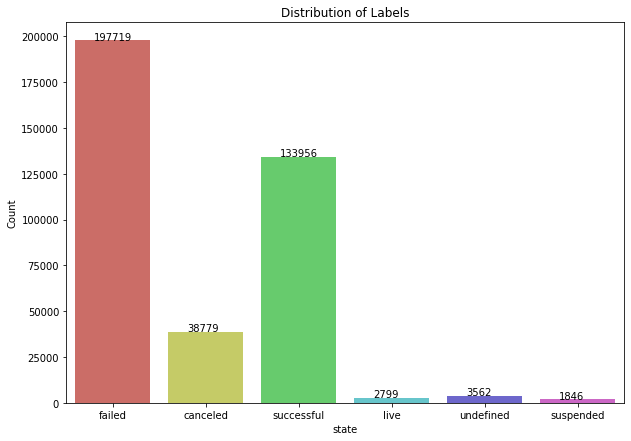

In [ ]:
plt.figure(figsize=(10,7))#Sandnyit
a= sns.countplot(x='state',data=data, palette='hls')
plt.title('Distribution of Labels')
plt.ylabel('Count')#Sandnyit

for p in a.patches:
        a.annotate('{}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+390))
plt.show()#Sandnyit

Here I will be combining ***cancelled*** and ***failed*** orders and removing ***live***, ***undefined*** and ***suspended*** states

In [ ]:
data.drop(data[data['state'] == 'live'].index, inplace = True)
data.drop(data[data['state'] == 'undefined'].index, inplace = True)
data.drop(data[data['state'] == 'suspended'].index, inplace = True)

Before combining lets first convert them to int using One Hot Encoding

In [ ]:
ohe=pd.get_dummies(data['state'])#Sandnyit

In [ ]:
data['failed']=ohe['failed']+ohe['canceled']
data['successful']=ohe['successful']#Sandnyit

In [ ]:
data.drop(['state'],axis=1, inplace=True)#Sandnyit

As we are using one hot endcoding method to generate two columns, one of those two generated columns becomes redundant, so we will remove failed column

In [ ]:
data.drop(['failed'],axis=1, inplace=True)#Sandnyit

## Handling *Country* Column

In [ ]:
data['country'].unique()#Sandnyit

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'SE',
       'FR', 'NL', 'NZ', 'CH', 'AT', 'BE', 'DK', 'HK', 'LU', 'SG', 'N,0"',
       'JP'], dtype=object)

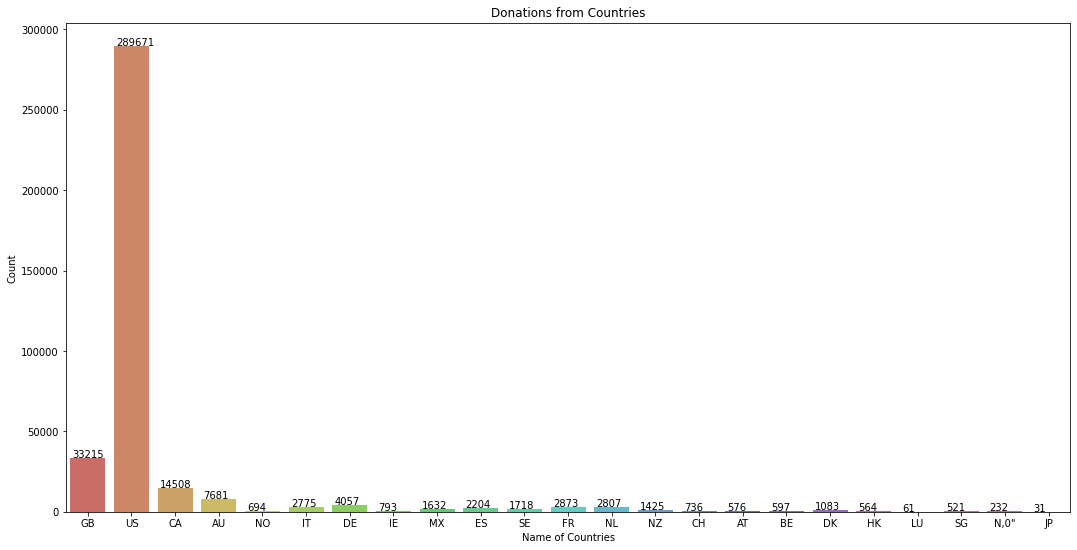

In [ ]:
plt.figure(figsize=(18,9))
a= sns.countplot(x='country',data=data, palette='hls')
plt.title('Donations from Countries')#Sandnyit
plt.ylabel('Count')
plt.xlabel("Name of Countries")

for p in a.patches:
        a.annotate('{}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+390))
plt.show()

In [ ]:
data.groupby(["country","successful"]).count()#Sandnyit

name  category  ...  launch_secs  time_taken
country successful                    ...                         
AT      0              469       469  ...          469         469
        1              107       107  ...          107         107
AU      0             5671      5671  ...         5671        5671
        1             2010      2010  ...         2010        2010
BE      0              445       445  ...          445         445
        1              152       152  ...          152         152
CA      0            10374     10374  ...        10374       10374
        1             4134      4134  ...         4134        4134
CH      0              549       549  ...          549         549
        1              187       187  ...          187         187
DE      0             3120      3120  ...         3120        3120
        1              937       937  ...          937         937
DK      0              723       723  ...          723         723
        1              360       360  ...          360         360
ES      0             1712      1712  ...         1712        1712
        1              492       492  ...          492         492
FR      0             1965      1965  ...         1965        1965
        1              908       908  ...          908         908
GB      0            21148     21148  ...        21148       21148
        1            12067     12067  ...        12067       12067
HK      0              348       348  ...          348         348
        1              216       216  ...          216         216
IE      0              586       586  ...          586         586
        1              207       207  ...          207         207
IT      0             2336      2336  ...         2336        2336
        1              439       439  ...          439         439
JP      0               24        24  ...           24          24
        1                7         7  ...            7           7
LU      0               42        42  ...           42          42
        1               19        19  ...           19          19
MX      0             1236      1236  ...         1236        1236
        1              396       396  ...          396         396
N,0"    0              127       127  ...          127         127
        1              105       105  ...          105         105
NL      0             2190      2190  ...         2190        2190
        1              617       617  ...          617         617
NO      0              532       532  ...          532         532
        1              162       162  ...          162         162
NZ      0              977       977  ...          977         977
        1              448       448  ...          448         448
SE      0             1209      1209  ...         1209        1209
        1              509       509  ...          509         509
SG      0              343       343  ...          343         343
        1              178       178  ...          178         178
US      0           180372    180372  ...       180372      180372
        1           109299    109299  ...       109299      109299

[46 rows x 23 columns]

Label Encoding Country

In [ ]:
labelencoder_X = LabelEncoder()
data['country'] = labelencoder_X.fit_transform(data['country'])

## Handling Currency Column

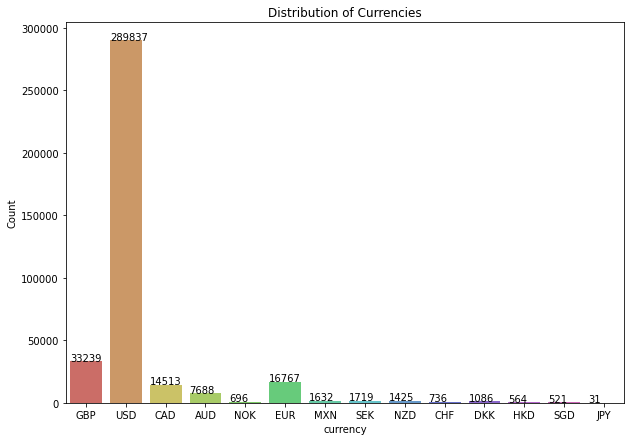

In [ ]:
plt.figure(figsize=(10,7))
a= sns.countplot(x='currency',data=data, palette='hls')
plt.title('Distribution of Currencies')
plt.ylabel('Count')

for p in a.patches:#Sandnyit
        a.annotate('{}'.format(p.get_height()), (p.get_x()+0.0, p.get_height()+390))
plt.show()

As already have all currencies convered into USD we will be removing '*pledged*' and '*goal*'. 

But we will keep currency column by doing labelencoding untill we check heatmap.

In [ ]:
labelencoder_X = LabelEncoder()
data['currency'] = labelencoder_X.fit_transform(data['currency'])#Sandnyit

In [ ]:
data.drop(['pledged','goal'],axis=1,inplace=True)#Sandnyit

### Create new column which has money pledged by a single backer

In [ ]:
data['money_per_backer']=data['usd_pledged_real']/data['backers']#Sandnyit

In [ ]:
data['money_per_backer'].fillna(0,inplace=True)#Sandnyit

In [ ]:
data[data['money_per_backer']==float('inf')].count()#Sandnyit

name                201
category            201
main_category       201
currency            201
deadline            201
backers             201
country             201
usd pledged         201
usd_pledged_real    201
usd_goal_real       201
launch_date         201
launch_time         201
launch_year         201
launch_month        201
launch_day          201
dead_year           201
dead_month          201
dead_day            201
launch_hour         201
launch_minute       201
launch_secs         201
time_taken          201
successful          201
money_per_backer    201
dtype: int64

In [ ]:
data['money_per_backer'] = np.where((data.money_per_backer == float('inf')),0,data.money_per_backer)#Sandnyit

Creating new column which has difference between money pledged and money goal

In [ ]:
data['diff_wrt_goal']=data['usd_goal_real']-data['usd_pledged_real']#Sandnyit

In [ ]:
data['pledged_diff']=data['usd_pledged_real']-data['usd pledged']#Sandnyit

## Handling Main_category

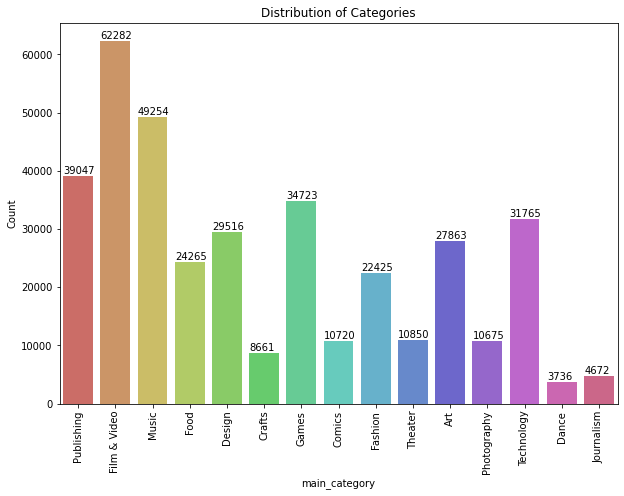

In [ ]:
plt.figure(figsize=(10,7))#Sandnyit
a= sns.countplot(x='main_category',data=data, palette='hls')#Sandnyit
plt.title('Distribution of Categories')#Sandnyit
plt.xticks(rotation='vertical')#Sandnyit
plt.ylabel('Count')
#Sandnyit
for p in a.patches:#Sandnyit
        a.annotate('{}'.format(p.get_height()), (p.get_x()+0.0, p.get_height()+390))#Sandnyit
plt.show()#Sandnyit

In [ ]:
data.groupby(["main_category","successful"]).count()#Sandnyit

name  category  ...  diff_wrt_goal  pledged_diff
main_category successful                   ...                             
Art           0           16353     16353  ...          16353         16353
              1           11510     11510  ...          11510         11510
Comics        0            4878      4878  ...           4878          4878
              1            5842      5842  ...           5842          5842
Crafts        0            6546      6546  ...           6546          6546
              1            2115      2115  ...           2115          2115
Dance         0            1398      1398  ...           1398          1398
              1            2338      2338  ...           2338          2338
Design        0           18966     18966  ...          18966         18966
              1           10550     10550  ...          10550         10550
Fashion       0           16832     16832  ...          16832         16832
              1            5593      5593  ...           5593          5593
Film & Video  0           38659     38659  ...          38659         38659
              1           23623     23623  ...          23623         23623
Food          0           18180     18180  ...          18180         18180
              1            6085      6085  ...           6085          6085
Games         0           22205     22205  ...          22205         22205
              1           12518     12518  ...          12518         12518
Journalism    0            3660      3660  ...           3660          3660
              1            1012      1012  ...           1012          1012
Music         0           25057     25057  ...          25057         25057
              1           24197     24197  ...          24197         24197
Photography   0            7370      7370  ...           7370          7370
              1            3305      3305  ...           3305          3305
Publishing    0           26747     26747  ...          26747         26747
              1           12300     12300  ...          12300         12300
Technology    0           25331     25331  ...          25331         25331
              1            6434      6434  ...           6434          6434
Theater       0            4316      4316  ...           4316          4316
              1            6534      6534  ...           6534          6534

[30 rows x 24 columns]

In [ ]:
data.groupby(["main_category","category"]).count()

name  currency  ...  diff_wrt_goal  pledged_diff
main_category category                        ...                             
Art           Art             8155      8155  ...           8155          8155
              Ceramics         302       302  ...            302           302
              Conceptual Art  1016      1016  ...           1016          1016
              Digital Art     1329      1329  ...           1329          1329
              Illustration    3125      3125  ...           3125          3125
...                            ...       ...  ...            ...           ...
Theater       Immersive        323       323  ...            323           323
              Musical          906       906  ...            906           906
              Plays           1363      1363  ...           1363          1363
              Spaces           212       212  ...            212           212
              Theater         7036      7036  ...           7036          7036

[170 rows x 24 columns]

As all rows from '*category*' are present in '*main_category*', we will be removing '*main_category*'

In [ ]:
data.drop('main_category',axis=1,inplace=True)#Sandnyit

Label Encoding '*Category*'

In [ ]:
labelencoder_X = LabelEncoder()
data['category'] = labelencoder_X.fit_transform(data['category'])#Sandnyit

## Handling Names

Many a time length of any campaign's name can be a deal breaker so lets add a variable which has lenght of name.

In [ ]:
# Count length of each Name
data['name_length'] = data['name'].str.split().str.len()

In [ ]:
print(f"Out of the {len(data)} projects in the dataset, there are {len(data[data.duplicated(subset='name')])} which are listed more than once. That is only {(len(data[data.duplicated(subset='name')])/len(data))*100} % of data was repepated and rest all the values were unique.\n\nSo we can remove this column as maximum values are unique")

Out of the 370454 projects in the dataset, there are 2753 which are listed more than once. That is only 0.7431421984915806 % of data was repepated and rest all the values were unique.

So we can remove this column as maximum values are unique


In [ ]:
data.drop('name',axis=1,inplace=True)#Sandnyit

# Exploratory Data Analysis

## Exploring Data

In [ ]:
data.info()#Sandnyit

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370454 entries, 1000002330 to 999988282
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   category          370454 non-null  int64         
 1   currency          370454 non-null  int64         
 2   deadline          370454 non-null  datetime64[ns]
 3   backers           370454 non-null  int64         
 4   country           370454 non-null  int64         
 5   usd pledged       370454 non-null  float64       
 6   usd_pledged_real  370454 non-null  float64       
 7   usd_goal_real     370454 non-null  float64       
 8   launch_date       370454 non-null  datetime64[ns]
 9   launch_time       370454 non-null  object        
 10  launch_year       370454 non-null  object        
 11  launch_month      370454 non-null  object        
 12  launch_day        370454 non-null  object        
 13  dead_year         370454 non-null  object      

In [ ]:
data.describe()

,category,currency,backers,country,usd pledged,usd_pledged_real,usd_goal_real,time_taken,successful,money_per_backer,diff_wrt_goal,pledged_diff,name_length
count,370454.000000,370454.000000,370454.000000,370454.000000,3.704540e+05,3.704540e+05,3.704540e+05,370454.000000,370454.000000,370454.000000,3.704540e+05,3.704540e+05,370454.000000
mean,80.743247,11.020853,106.919148,18.900954,7.072006e+03,9.147588e+03,4.507638e+04,34.406485,0.361600,65.158537,3.592879e+04,2.075582e+03,5.680044
std,45.267379,3.930153,914.979076,6.276942,7.879810e+04,9.166409e+04,1.128265e+06,60.689140,0.480464,136.996310,1.131449e+06,3.895748e+04,2.751687
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e-02,1.000000,0.000000,0.000000,-1.983899e+07,-1.196293e+05,1.000000
25%,39.000000,13.000000,2.000000,22.000000,1.871000e+01,3.244000e+01,2.000000e+03,30.000000,0.000000,14.322650,-2.020000e+02,0.000000e+00,3.000000
50%,87.000000,13.000000,12.000000,22.000000,4.010000e+02,6.330000e+02,5.500000e+03,30.000000,0.000000,40.584735,1.970000e+03,0.000000e+00,5.000000
75%,121.000000,13.000000,57.000000,22.000000,3.063000e+03,4.076000e+03,1.596004e+04,37.000000,1.000000,76.000000,1.000000e+04,0.000000e+00,8.000000
max,158.000000,13.000000,219382.000000,22.000000,2.033899e+07,2.033899e+07,1.663614e+08,14867.000000,1.000000,10000.000000,1.663614e+08,7.164658e+06,29.000000


In [ ]:
data.groupby(["launch_year","successful"]).count()

category  currency  ...  pledged_diff  name_length
launch_year successful                      ...                           
1970        0                  6         6  ...             6            6
2009        0                750       750  ...           750          750
            1                579       579  ...           579          579
2010        0               5910      5910  ...          5910         5910
            1               4593      4593  ...          4593         4593
2011        0              14022     14022  ...         14022        14022
            1              12171     12171  ...         12171        12171
2012        0              23219     23219  ...         23219        23219
            1              17892     17892  ...         17892        17892
2013        0              25376     25376  ...         25376        25376
            1              19415     19415  ...         19415        19415
2014        0              45617     45617  ...         45617        45617
            1              21107     21107  ...         21107        21107
2015        0              53228     53228  ...         53228        53228
            1              20971     20971  ...         20971        20971
2016        0              37645     37645  ...         37645        37645
            1              18766     18766  ...         18766        18766
2017        0              30723     30723  ...         30723        30723
            1              18462     18462  ...         18462        18462
2018        0                  2         2  ...             2            2

[20 rows x 23 columns]

In [ ]:
data.groupby(["time_taken","successful"]).count().head(30)

category  currency  ...  pledged_diff  name_length
time_taken successful                      ...                           
1          0                 66        66  ...            66           66
           1                 35        35  ...            35           35
2          0                 90        90  ...            90           90
           1                 55        55  ...            55           55
3          0                145       145  ...           145          145
           1                 70        70  ...            70           70
4          0                126       126  ...           126          126
           1                 83        83  ...            83           83
5          0                285       285  ...           285          285
           1                194       194  ...           194          194
6          0                188       188  ...           188          188
           1                148       148  ...           148          148
7          0                947       947  ...           947          947
           1                804       804  ...           804          804
8          0                293       293  ...           293          293
           1                336       336  ...           336          336
9          0                260       260  ...           260          260
           1                315       315  ...           315          315
10         0               1254      1254  ...          1254         1254
           1                993       993  ...           993          993
11         0                320       320  ...           320          320
           1                418       418  ...           418          418
12         0                447       447  ...           447          447
           1                497       497  ...           497          497
13         0                393       393  ...           393          393
           1                452       452  ...           452          452
14         0               2016      2016  ...          2016         2016
           1               2082      2082  ...          2082         2082
15         0               3052      3052  ...          3052         3052
           1               2218      2218  ...          2218         2218

[30 rows x 23 columns]

## Data Visualisation

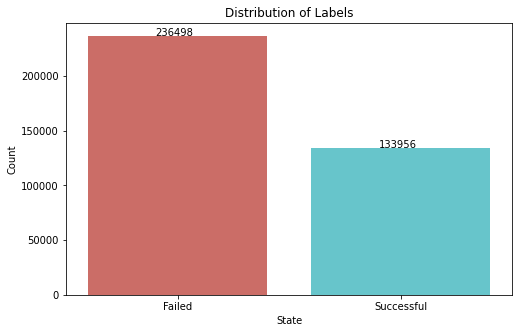

In [ ]:
plt.figure(figsize=(8,5))
a= sns.countplot(x='successful',data=data, palette='hls')
plt.title('Distribution of Labels')
plt.xlabel('State')
plt.ylabel('Count')#Sandnyit
a.set_xticklabels(labels=["Failed",'Successful'])
for p in a.patches:
        a.annotate('{}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+90))

plt.show()

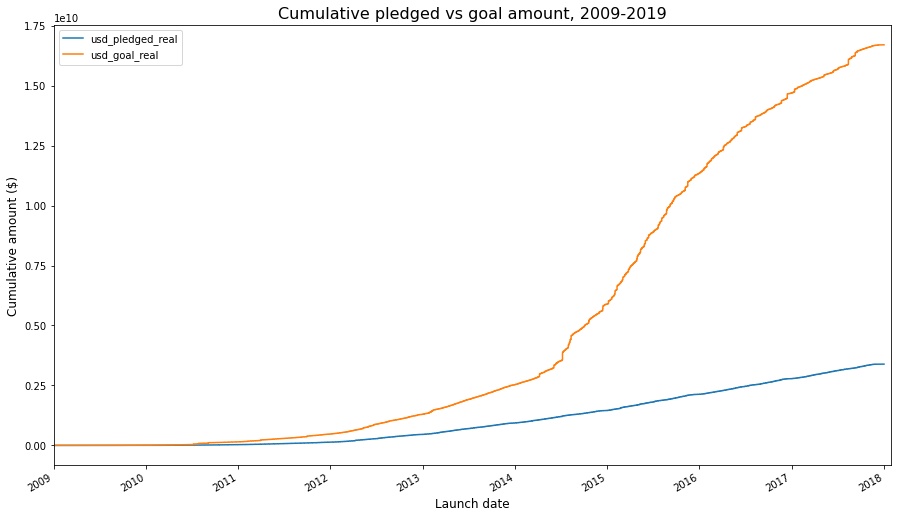

In [ ]:
# Plotting the number of pledged and goal for projects each year
#Sandnyit
plt.figure(figsize=(15,9))
#Sandnyit
data.set_index('launch_date').sort_index().usd_pledged_real.cumsum().plot()
data.set_index('launch_date').sort_index().usd_goal_real.cumsum().plot()
#Sandnyit
plt.xlim('2009-01-01', '2018-01-28') # Not including 1970 as it was making graph less informative
plt.xlabel('Launch date', fontsize=12)
plt.ylabel('Cumulative amount ($)', fontsize=12)
plt.title('Cumulative pledged vs goal amount, 2009-2019', fontsize=16)
#Sandnyit
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1211: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1211: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will 

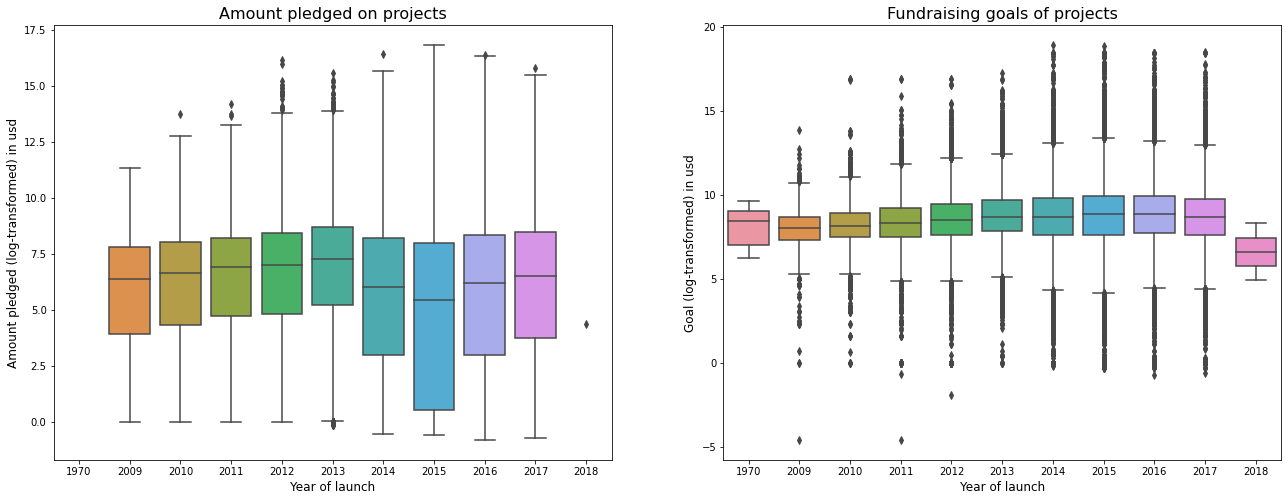

In [ ]:
# Plotting the number of pledged and goal for projects each year
fig, ax = plt.subplots(1,2, figsize=(22,8))
#Sandnyit
# Plotting the distribution of pledged amounts each year
sns.boxplot(data.launch_date.dt.year, np.log(data.usd_pledged_real), ax=ax[0])
ax[0].set_xlabel('Year of launch', fontsize=12)
ax[0].set_ylabel('Amount pledged (log-transformed) in usd', fontsize=12) # Log-transforming to make the trend clearer, as the distribution is heavily positively skewed
ax[0].set_title('Amount pledged on projects', fontsize=16)
#Sandnyit
# Plotting the distribution of goal amounts each year
sns.boxplot(data.launch_date.dt.year, np.log(data.usd_goal_real),ax=ax[1])
ax[1].set_xlabel('Year of launch', fontsize=12)
ax[1].set_ylabel('Goal (log-transformed) in usd', fontsize=12) # Log-transforming to make the trend clearer, as the distribution is heavily positively skewed
ax[1].set_title('Fundraising goals of projects', fontsize=16)
#Sandnyit
plt.show()

# Preprocessing

Dropping some colums which we dont need for modeling

In [ ]:
data.drop(['deadline','launch_date','launch_time','launch_secs'], axis=1,inplace=True)

## Seperating Target Column

In [ ]:
target_data=data[['successful']]

In [ ]:
target_data

,successful
ID,
1000002330,0
1000003930,0
1000004038,0
1000007540,0
1000011046,0
...,...
999976400,0
999977640,0
999986353,0


In [ ]:
data.drop('successful',axis=1,inplace=True)

## Standard Scaling

In [ ]:
sc = StandardScaler()
sc.fit(data)
sc_data=pd.DataFrame(sc.transform(data))

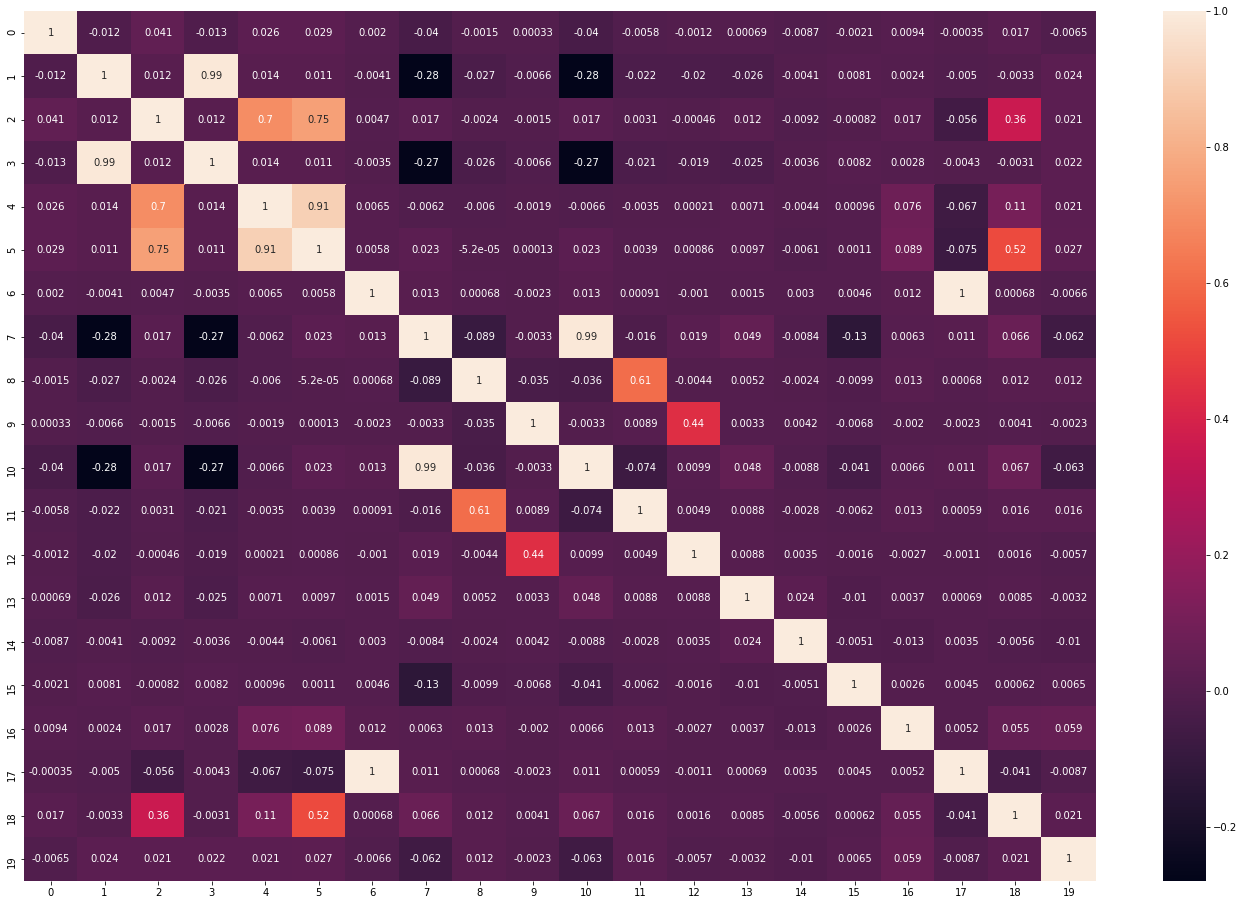

In [ ]:
plt.figure(figsize=(24,16))
sns.heatmap(sc_data.corr(),annot=True)
plt.show()

## Train Test Split

In [ ]:
# Creating the dataframes for training and test datasets

X_train, X_test, y_train, y_test = train_test_split(sc_data,target_data , test_size = 0.25, random_state = 0)#Sandnyit

# Functions

## Cross Validation

In [ ]:
def cross_val(model):#Sandnyit
  accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
  print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
  print("Standard Deviation: {:.2f} %".format(accuracies.std()))
  print('\n   \033[4;35;1;43m\033[1mCross Val Score\033[m\033[m\033[m\n')

## ROC Curve

In [ ]:
def roc(model):
  logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
  fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
  plt.figure()
  plt.plot(fpr, tpr, label='receiver operating characteristic curve value (area = %0.2f)' % logit_roc_auc)#Sandnyit
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.show()#Sandnyit

## Accuracies

In [ ]:
def accuracy(pred):#Sandnyit
  print("PRECISION : ",precision_score(y_test,pred))
  print("ACCURACY : ",accuracy_score(y_test,pred))
  print("RECALL : ",recall_score(y_test,pred))
  print("F1 SCORE : ",f1_score(y_test,pred))

# Modeling

## Logistic Regression

### Training

In [ ]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)#Sandnyit
log_pred = logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Validation 

In [ ]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))#Sandnyit

Accuracy of logistic regression classifier on train set: 0.92
Accuracy of logistic regression classifier on test set: 0.92


In [ ]:
accuracy(log_pred)#Sandnyit

PRECISION :  0.9452732040754912
ACCURACY :  0.9177497941720317
RECALL :  0.8201723301876236
F1 SCORE :  0.8782903934491711


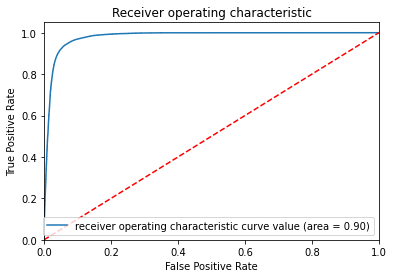

In [ ]:
roc(logreg)

In [ ]:
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

## Random Forest

### Training

In [ ]:
ranreg = RandomForestClassifier()
ranreg.fit(X_train,y_train)
ran_pred=ranreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
plt.figure(figsize=(20,20))
plot_tree(ranreg, filled=True)
plt.show()

### Evaluation

In [ ]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(ranreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(ranreg.score(X_test, y_test)))#Sandnyit

Accuracy of logistic regression classifier on train set: 1.00
Accuracy of logistic regression classifier on test set: 1.00


In [ ]:
accuracy(ran_pred)#Sandnyit

PRECISION :  0.9944728837450849
ACCURACY :  0.997988959522749
RECALL :  1.0
F1 SCORE :  0.9972287834545353


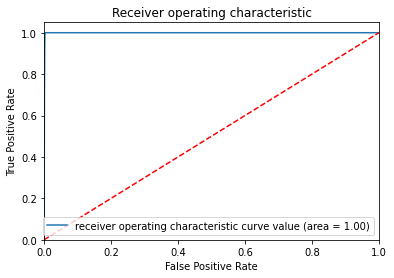

In [ ]:
roc(ranreg)